In [45]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def p2f(x):
    return float(x.strip('%'))/100

In [46]:
from plotly.io import write_html

In [47]:
EITC = pd.read_csv('EITC.csv')
EITC2021 = pd.read_csv('EITC2021.csv', converters={'EITC':p2f})
Poverty = pd.read_csv('Poverty Decrease.csv')
Family = pd.read_excel('Family Poverty.xlsx')
US_ally = pd.read_csv('US_ally.csv')
US_unemployment = pd.read_csv('US_unemployment.csv')
df = pd.read_csv('df.csv')

## Introduction

Last time we conducted data exploration. We run several regressions and found that **there are no relationships between average tax rate and unemployment rates**. But after drawing some graphs, we noticed that they become negative related since 1990s. Hence, we paid attentions to **the welfare reform in 1990s** and focus on **earned income tax credit (EITC)**. You can find more background information here [Welfare Reform and the Work Support System](https://www.brookings.edu/research/welfare-reform-and-the-work-support-system/).

ValueError: 
The fig parameter must be a dict or Figure.
    Received value of type <class 'matplotlib.figure.Figure'>: Figure(432x288)

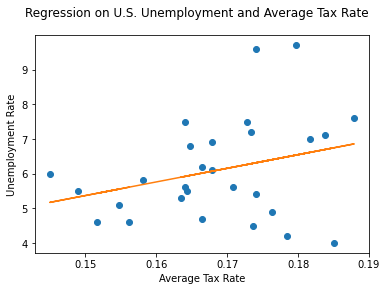

In [48]:
df1 = pd.merge(US_unemployment, US_ally,  how='left', left_on=['Year'], right_on = ['year'])
df1 = df1[df1["year"] < 2008]
X = df1["c_avg"].to_frame()
Y = df1["rate"].to_frame()
reg = LinearRegression().fit(X, Y)
reg.score(X,Y)
fig = plt.figure()
fig.suptitle('Regression on U.S. Unemployment and Average Tax Rate')
plt.xlabel('Average Tax Rate')
plt.ylabel('Unemployment Rate')
plt.plot(X, Y, 'o')
plt.plot(X, reg.coef_* X + reg.intercept_)
write_html(fig, "1.html")

# EITC

There are many studies on the influence of federeal EITC but less studies on in-state EITC. With the data in hands, we will inspect on both **federal EITC** and **in-state EITC**. Our research will be on both nation and state levels. Below is a graph showing the present state EITC policies. We've noticed that California and South Carolina have a particularlly high EITC percentage and states in the northeast tend to have in-state EITC.

In [49]:
EITC2021['text'] = EITC2021['State'] + '<br>' +'Year Enacted: ' + EITC2021['Year'] + '<br>' + \
                    'Refundable: '+ EITC2021['Refundable'] + '<br>' +EITC2021['Note'] 

fig = go.Figure(data=go.Choropleth(
    locations=EITC2021['Code'],
    z=EITC2021['EITC'],
    text = EITC2021['text'],
    locationmode='USA-states',
    colorscale='blues',
    autocolorscale=False,
    marker_line_color='white', # line markers between states
    colorbar_title="EITC<br>Percentage"
))

fig.update_layout(
    title_text='2021 Earned Income Tax Credit by States',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa')
    ),
    annotations = [dict(
        x=0.5,
        y=-0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://www.taxcreditsforworkersandfamilies.org/state-tax-credits/">\
            State Tax Credits</a>',
        showarrow = False
    )]
)

fig.show()
write_html(fig, "2.html")

# EITC and Unemployment

In [59]:
#Graph from last time
US_ally = pd.read_csv('US_ally.csv')
US_unemployment = pd.read_csv('US_unemployment.csv')
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(
    x=US_unemployment['Year'],
    y=US_unemployment['rate'],
    name = "unemployment rate"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(
    x=US_ally['year'],
    y=US_ally['c_avg'],
    name = "tax rate"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="U.S. Unemployment and Average Tax Rate",
    annotations = [dict(
        x=0.5,
        y=-0.22,
        xref='paper',
        yref='paper',
        text='Source: <a href="http://users.nber.org/~taxsim/allyup/ally.html">\
            Marginal and Average Tax Rates and Elasticities for the US 1960-2019 </a><br><a href="https://www.icip.iastate.edu/tables/employment/unemployment-states">\
            Annual Unemployment Rates by State</a>',
        showarrow = False
    )]
)

fig.add_vrect(x0=1992, x1=1997, 
              annotation_text="State<br>Welfare<br>Waivers", annotation_position="top",
              fillcolor="green", opacity=0.25, line_width=0
             )
fig.add_vline(x=1975, line_width=2, line_dash="dash", line_color="green",annotation_text = "Tax Reduction<br>Act of 1975",annotation_position="top left")
fig.add_vline(x=1986, line_width=2, line_dash="dash", line_color="green",annotation_text = "Tax Reform<br>Act of 1986",annotation_position="top left")

# Set x-axis title
fig.update_xaxes(title_text="Year")

# Set y-axes titles
fig.update_yaxes(title_text="Unemployent Rate", secondary_y=False)
fig.update_yaxes(title_text="Average Tax Rate", secondary_y=True)

fig.show()
write_html(fig, "3.html")

It seems that tax and uemployment rates become negative related since 1990s. We draw some graphs on several states to see whether in-state EITC has the same effect on unemployment.

In [51]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

df = pd.read_csv('df.csv')

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

state = 'dc'
plotly = df[df['code']== state]

# Add traces
fig.add_trace(
    go.Scatter(
    x=plotly['year'],
    y=plotly['rate'],
    name = "unemployment rate"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(
    x=plotly['year'],
    y=plotly['c_avg'],
    name = "average tax rate"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text=state.upper()+" Unemployment and Average Tax Rate",
    annotations = [dict(
        x=0.5,
        y=-0.22,
        xref='paper',
        yref='paper',
        text='Source: <a href="http://users.nber.org/~taxsim/allyup/ally.html">\
            Marginal and Average Tax Rates and Elasticities for the US 1960-2019 </a><br><a href="https://www.icip.iastate.edu/tables/employment/unemployment-states">\
            Annual Unemployment Rates by State</a>',
        showarrow = False
    )]
)

fig.add_vrect(x0=1992, x1=1997, 
              annotation_text="State<br>Welfare<br>Waivers", annotation_position="top",
              fillcolor="green", opacity=0.25, line_width=0
             )

fig.add_vline(x=2000, line_width=2, line_dash="dash", line_color="green",annotation_text = "10%<br>EITC")
fig.add_vline(x=2005, line_width=2, line_dash="dash", line_color="green",annotation_text = "35%<br>EITC")
fig.add_vline(x=2008, line_width=2, line_dash="dash", line_color="green",annotation_text = "40%<br>EITC")


# Set x-axis title
fig.update_xaxes(title_text="Year")

# Set y-axes titles
fig.update_yaxes(title_text="Unemployent Rate", secondary_y=False)
fig.update_yaxes(title_text="Average Tax Rate", secondary_y=True)

fig.show()
write_html(fig, "4.html")

In [52]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

df = pd.read_csv('df.csv')

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

state = 'md'
plotly = df[df['code']== state]

# Add traces
fig.add_trace(
    go.Scatter(
    x=plotly['year'],
    y=plotly['rate'],
    name = "unemployment rate"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(
    x=plotly['year'],
    y=plotly['c_avg'],
    name = "average tax rate"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text=state.upper()+" Unemployment and Average Tax Rate",
    annotations = [dict(
        x=0.5,
        y=-0.22,
        xref='paper',
        yref='paper',
        text='Source: <a href="http://users.nber.org/~taxsim/allyup/ally.html">\
            Marginal and Average Tax Rates and Elasticities for the US 1960-2019 </a><br><a href="https://www.icip.iastate.edu/tables/employment/unemployment-states">\
            Annual Unemployment Rates by State</a>',
        showarrow = False
    )]
)

fig.add_vrect(x0=1992, x1=1997, 
              annotation_text="State<br>Welfare<br>Waivers", annotation_position="top",
              fillcolor="green", opacity=0.25, line_width=0)

fig.add_vline(x=1987, line_width=2, line_dash="dash", line_color="green",annotation_text = "50%<br>EITC")
fig.add_vline(x=1998, line_width=2, line_dash="dash", line_color="green",annotation_text = "10%<br>EITC")
fig.add_vline(x=2001, line_width=2, line_dash="dash", line_color="green",annotation_text = "16%<br>EITC")
fig.add_vline(x=2004, line_width=2, line_dash="dash", line_color="green",annotation_text = "20%<br>EITC")
fig.add_vline(x=2008, line_width=2, line_dash="dash", line_color="green",annotation_text = "25%<br>EITC")


# Set x-axis title
fig.update_xaxes(title_text="Year")

# Set y-axes titles
fig.update_yaxes(title_text="Unemployent Rate", secondary_y=False)
fig.update_yaxes(title_text="Average Tax Rate", secondary_y=True)

fig.show()
write_html(fig, "5.html")

We chose two states that gradually increased their EITC and observe **a drop in unemployment rate after EITC rate is raised**. We may do this kind of analysis to more states in the future. We refer to [TAXISM](http://users.nber.org/~taxsim/state-eitc.html) for state EITC rules.

# EITC and Poverty

Running a simple linear regression, we find that there are no storng relationship between U.S. family poverty rate and tax rate, as shown in the graph below.

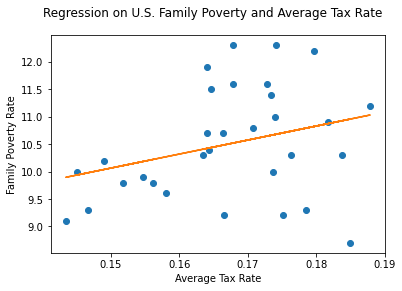

In [53]:
Family.dropna(subset = ["Average Tax Rate"], inplace=True)
Family = Family[Family["Year"] < 2008]
y = Family["Poverty rate for families"].to_frame()
x = Family["Average Tax Rate"].to_frame()
reg = LinearRegression().fit(x, y)
fig1 = plt.figure()
fig1.suptitle('Regression on U.S. Family Poverty and Average Tax Rate')
plt.xlabel('Average Tax Rate')
plt.ylabel('Family Poverty Rate')
plt.plot(x, y, 'o')
plt.plot(x, reg.coef_* x + reg.intercept_)
write_html(fig, "6.html")

From the graph below we can see that the welfare reform did potentially decrease the family poverty rate.

In [54]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(
    x=Family['Year'],
    y=Family['Poverty rate for families'],
    name = "Poverty rate for families"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(
    x=Family['Year'],
    y=Family['Average Tax Rate'],
    name = "Average Tax Rate"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="U.S. Family Poverty and Average Tax Rate",
    annotations = [dict(
        x=0.5,
        y=-0.22,
        xref='paper',
        yref='paper',
        text='Source: <a href="http://users.nber.org/~taxsim/allyup/ally.html">\
            Marginal and Average Tax Rates and Elasticities for the US 1960-2019 </a><br>\
            <a href="https://www.census.gov/data/tables/time-series/demo/income-poverty/historical-poverty-people.html">\
            Census Bureau Table 4</a>',
        showarrow = False
    )]
)

fig.add_vrect(x0=1992, x1=1997, 
              annotation_text="State<br>Welfare<br>Waivers", annotation_position="top",
              fillcolor="green", opacity=0.25, line_width=0)

# Set x-axis title
fig.update_xaxes(title_text="Year")

# Set y-axes titles
fig.update_yaxes(title_text="Unemployent Rate", secondary_y=False)
fig.update_yaxes(title_text="Average Tax Rate", secondary_y=True)

fig.show()
write_html(fig, "7.html")

A study by CBPP collect data on the number of working families benifited from EITC in each state. We notice that California, Texas, Florida, and New York have the most many families receiving federal ETIC. States in the east tend to have more families receiving EITC.

In [55]:
EITC['text'] = EITC['State'] + '<br>' +'Proportion to nation total: ' + EITC['Proportion']

fig = go.Figure(data=go.Choropleth(
    locations=EITC['Code'],
    z=EITC['Family'],
    text = EITC['text'],
    locationmode='USA-states',
    colorscale='Blues',
    autocolorscale=False,
    marker_line_color='white', # line markers between states
    colorbar_title="Number of<br>Families"
))

fig.update_layout(
    title_text='2016 Working Families Benefited from the EITC by States',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa')
    ),
    annotations = [dict(
        x=0.5,
        y=-0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://www.cbpp.org/fact-sheets-eitc-usage-by-congressional-district-and-state">\
            Center on Budget adn Policy Priorities</a>',
        showarrow = False
    )]
)

fig.show()
write_html(fig, "8.html")

From the graph of poverty rate by states, we notice that states in the south tend to have a high proverty level. Looking at the poverty change graph, we notice that the changes are unevenly nationwide and seem to have no relationship with the in-state EITC percentage. If we compare the poverty change to the state EITC rules and the number of families benefited from federal EITC, we cannot see any pattern. It may prove that EITC does not help with decreasing poverty level.

In [56]:
Poverty['Standard Error'] = Poverty['Standard Error'].astype(str)
Poverty['text'] = Poverty['State'] + '<br>' +'Standard Error: ' + Poverty['Standard Error']

fig = go.Figure(data=go.Choropleth(
    locations=Poverty['Code'],
    z=Poverty['Poverty_2020'],
    text = Poverty['text'],
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    marker_line_color='white', # line markers between states
    colorbar_title="Percent<br>of People%"
))

fig.update_layout(
    title_text='Percent of People in Poverty by State: 2020',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa')
    ),
    annotations = [dict(
        x=0.5,
        y=-0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://www.census.gov/data/tables/time-series/demo/income-poverty/historical-poverty-people.html">\
            Census Bureau</a>',
        showarrow = False
    )]
)

fig.show()
write_html(fig, "9.html")

In [57]:
fig = go.Figure(data=go.Choropleth(
    locations=Poverty['Code'],
    z=Poverty['Poverty Decrease'],
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    marker_line_color='white', # line markers between states
    colorbar_title="Poverty Change<br>in percentage points"
))

fig.update_layout(
    title_text='Poverty Change in percentage points<br>(2019-2020 average less 2017-2018 average)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa')
    ),
    annotations = [dict(
        x=0.5,
        y=-0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://www.census.gov/data/tables/2021/demo/income-poverty/p60-273.html/">\
            Census Bureau Table 21</a>',
        showarrow = False
    )]
)

fig.show()
write_html(fig, "10.html")

# Conclusion and Further Study

In sum, our conclusions are:
- To solve unemployment and poverty, we should focus more on transfer than taxation.
- EITC on both federal and state levels help to the decline in unemployment rate.
- The poverty level in each state does not decrease with more EITC.

Our further study may be focus on how EITC influences children poverty and women participation in workforce.